In [39]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data=pd.read_csv("gbm-data.csv")

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X=data.drop("Activity",axis=1,inplace=False)
y=data["Activity"]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=241)

In [26]:
def model_testing_learning_rate(learning_rate):
    model=GradientBoostingClassifier(n_estimators=250,verbose=True,learning_rate=learning_rate,random_state=241)
    model.fit(X_train,y_train)
    train_log_loss_result=log_loss_result(model,X_train,y_train)
    test_log_loss_result=log_loss_result(model,X_test,y_test)
    plt.figure()
    plt.plot(test_log_loss_result,'r',linewidth=2)
    plt.plot(train_log_loss_result,'g',linewidth=2)
    plt.legend(["test","train"])
    min_loss_value=min(test_log_loss_result)
    min_loss_index=test_log_loss_result.index(min_loss_value)
    return min_loss_value,min_loss_index

In [33]:
def sigmoid(y_pred):
    return 1.0/(1.0+math.exp(-y_pred))

In [35]:
def log_loss_result(model,X,y):
    results=[]
    pred=model.staged_decision_function(X)
    for s_pred in pred:
        results.append(log_loss(y,[sigmoid(y_pred) for y_pred in s_pred]))
    return results

      Iter       Train Loss   Remaining Time 
         1           1.0190           31.13s
         2           0.9192           31.00s
         3           0.8272           28.30s
         4           0.7834           26.92s
         5           0.7109           26.04s
         6           0.6368           26.69s
         7           0.5797           26.59s
         8           0.5610           25.53s
         9           0.5185           25.11s
        10           0.4984           24.75s
        20           0.1999           23.90s
        30           0.1313           21.54s
        40           0.0790           20.26s
        50           0.0511           19.13s
        60           0.0352           17.96s
        70           0.0245           16.84s
        80           0.0162           15.87s
        90           0.0114           14.86s
       100           0.0077           13.88s
       200           0.0004            4.11s
      Iter       Train Loss   Remaining Time 
        

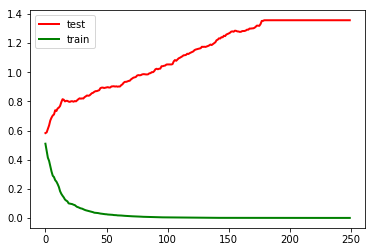

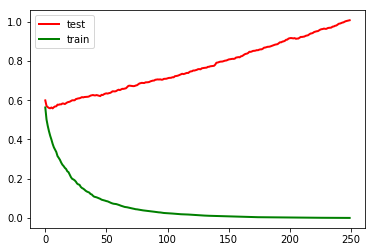

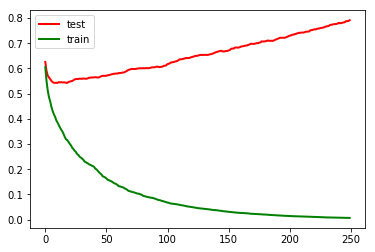

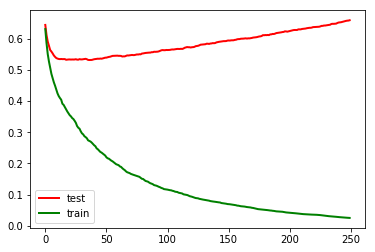

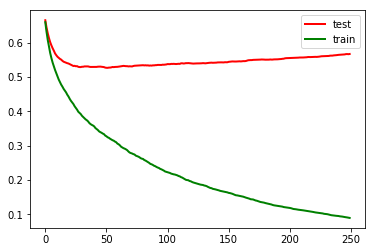

In [38]:
min_loss_result={}
for l_r in [1.0,0.5,0.3,0.2,0.1]:
    min_loss_result[l_r]=model_testing_learning_rate(l_r)

На графиках начиная с некоторой итерации наблюдается переобучение.

In [42]:
min_loss_value,min_loss_index=min_loss_result[0.2]

In [47]:
print("Минимальное значение log_loss,при learning_rate=0.2, равное {:0.2f}, достигается на {}-й итерации".format(min_loss_value,
                                                                                          min_loss_index))

Минимальное значение log_loss,при learning_rate=0.2, равное 0.53, достигается на 36-й итерации


In [48]:
model=RandomForestClassifier(n_estimators=min_loss_index,random_state=241)
model.fit(X_train,y_train)
y_pred=model.predict_proba(X_test)[:,1]
test_loss=log_loss(y_test,y_pred)
print(test_loss)

0.54138128618
